In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
df=pd.read_csv('train-2.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==931]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017025,931,2,2013-01-01,0,0,0,0,a,1
1015910,931,3,2013-01-02,3574,476,1,0,0,1
1014795,931,4,2013-01-03,3047,431,1,0,0,1
1013680,931,5,2013-01-04,2525,324,1,0,0,1
1012565,931,6,2013-01-05,2341,277,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5390,931,1,2015-07-27,7024,686,1,1,0,1
4275,931,2,2015-07-28,5798,617,1,1,0,1
3160,931,3,2015-07-29,5558,662,1,1,0,1
2045,931,4,2015-07-30,5720,645,1,1,0,1
930,931,5,2015-07-31,5943,713,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017025 to 930
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.Sales.value_counts()

0       67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [15]:
atr2['Sales']=atr2['Sales'].replace(0,112)

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
atr2.Sales.value_counts()

112     67
3124     4
3375     3
3277     3
4566     3
        ..
2997     1
3979     1
4091     1
3970     1
5943     1
Name: Sales, Length: 777, dtype: int64

In [17]:
atr2=atr2.set_index('Date')

In [18]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,931,2,112,0,0,0,a,1
2013-01-02,931,3,3574,476,1,0,0,1
2013-01-03,931,4,3047,431,1,0,0,1
2013-01-04,931,5,2525,324,1,0,0,1
2013-01-05,931,6,2341,277,1,0,0,0


In [19]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [20]:
atr2.head()

,Sales
Date,
2013-01-01,112
2013-01-02,3574
2013-01-03,3047
2013-01-04,2525
2013-01-05,2341


In [21]:
atr2.tail()

,Sales
Date,
2015-07-27,7024
2015-07-28,5798
2015-07-29,5558
2015-07-30,5720
2015-07-31,5943


<AxesSubplot:xlabel='Date'>

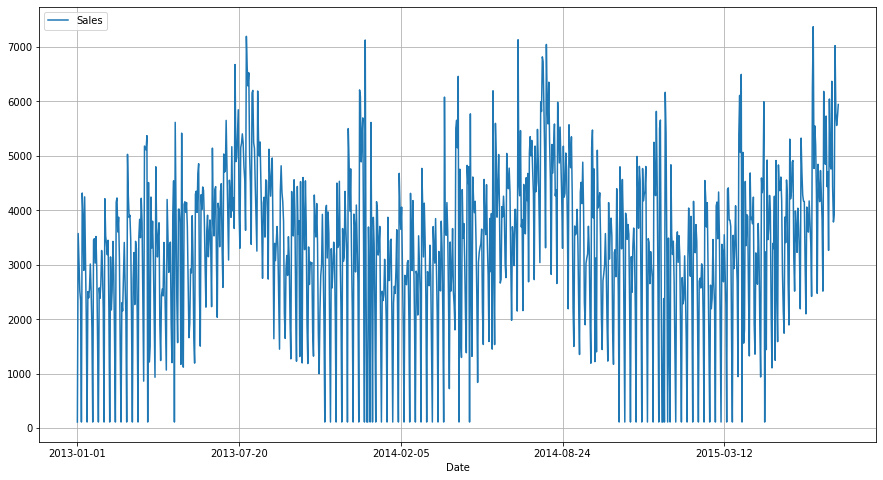

In [22]:
atr2.plot(figsize=(15,8), grid=True)

In [23]:
df1=atr2.reset_index()['Sales']

In [24]:
df1.shape

(942,)

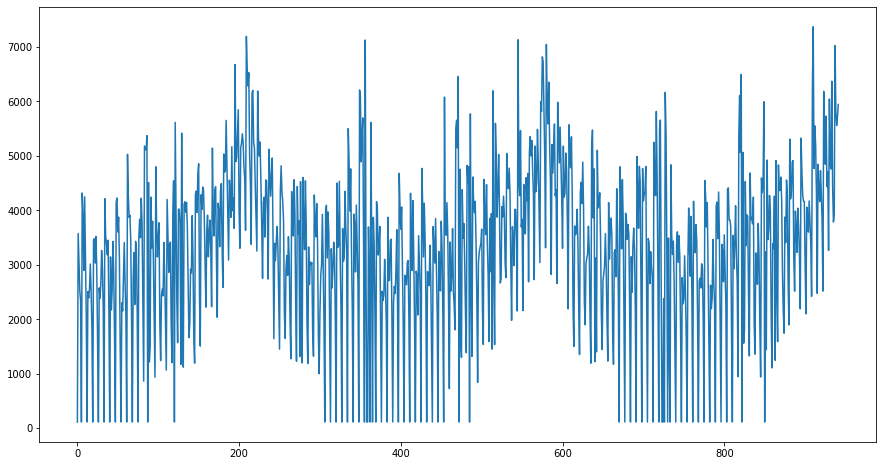

In [25]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.5       ],
       [0.73842975],
       [0.70213499],
       [0.66618457],
       [0.6535124 ],
       [0.5       ],
       [0.78966942],
       [0.75971074],
       [0.69187328],
       [0.78477961],
       [0.70902204],
       [0.63367769],
       [0.5       ],
       [0.6649449 ],
       [0.65702479],
       [0.66866391],
       [0.69986226],
       [0.66535813],
       [0.61887052],
       [0.5       ],
       [0.73009642],
       [0.73188705],
       [0.70103306],
       [0.73464187],
       [0.6922865 ],
       [0.60337466],
       [0.5       ],
       [0.6696281 ],
       [0.65647383],
       [0.67451791],
       [0.71694215],
       [0.69407713],
       [0.64366391],
       [0.5       ],
       [0.78243802],
       [0.73546832],
       [0.72472452],
       [0.71157025],
       [0.72988981],
       [0.6399449 ],
       [0.5       ],
       [0.70881543],
       [0.64173554],
       [0.66604683],
       [0.72844353],
       [0.68684573],
       [0.60392562],
       [0.5  

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(612, 330)

In [30]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.5       ]
 [0.73842975]
 [0.70213499]
 [0.66618457]
 [0.6535124 ]
 [0.5       ]
 [0.78966942]
 [0.75971074]
 [0.69187328]
 [0.78477961]
 [0.70902204]
 [0.63367769]
 [0.5       ]
 [0.6649449 ]
 [0.65702479]
 [0.66866391]
 [0.69986226]
 [0.66535813]
 [0.61887052]
 [0.5       ]
 [0.73009642]
 [0.73188705]
 [0.70103306]
 [0.73464187]
 [0.6922865 ]
 [0.60337466]
 [0.5       ]
 [0.6696281 ]
 [0.65647383]
 [0.67451791]
 [0.71694215]
 [0.69407713]
 [0.64366391]
 [0.5       ]
 [0.78243802]
 [0.73546832]
 [0.72472452]
 [0.71157025]
 [0.72988981]
 [0.6399449 ]
 [0.5       ]
 [0.70881543]
 [0.64173554]
 [0.66604683]
 [0.72844353]
 [0.68684573]
 [0.60392562]
 [0.5       ]
 [0.77809917]
 [0.7834022 ]
 [0.74035813]
 [0.75909091]
 [0.70626722]
 [0.59263085]
 [0.5       ]
 [0.65082645]
 [0.64056474]
 [0.68615702]
 [0.72713499]
 [0.67658402]
 [0.63519284]
 [0.5       ]
 [0.83856749]
 [0.78629477]
 [0.75874656]
 [0.76150138]
 [0.73050964]
 [0.62954545]
 [0.5       ]
 [0.67947658]
 [0.71432507]
 [0.64

In [31]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.78519284]
 [0.64414601]
 [0.59559229]
 [0.74793388]
 [0.7369146 ]
 [0.73953168]
 [0.76900826]
 [0.72658402]
 [0.64690083]
 [0.58539945]
 [0.79077135]
 [0.80316804]
 [0.77623967]
 [0.82865014]
 [0.76969697]
 [0.65110193]
 [0.62300275]
 [0.70055096]
 [0.70743802]
 [0.71232782]
 [0.74758953]
 [0.71756198]
 [0.63512397]
 [0.57438017]
 [0.84669421]
 [0.86935262]
 [0.75812672]
 [0.82011019]
 [0.57637741]
 [0.70743802]
 [0.5887741 ]
 [0.84373278]
 [0.7707989 ]
 [0.77596419]
 [0.7899449 ]
 [0.73443526]
 [0.63636364]
 [0.59166667]
 [0.67865014]
 [0.68753444]
 [0.69841598]
 [0.73836088]
 [0.69538567]
 [0.62775482]
 [0.57706612]
 [0.77747934]
 [0.70612948]
 [0.74256198]
 [0.75792011]
 [0.73519284]
 [0.61301653]
 [0.57300275]
 [0.7142562 ]
 [0.71797521]
 [0.68374656]
 [0.79511019]
 [0.7446281 ]
 [0.66129477]
 [0.5       ]
 [0.82279614]
 [0.78856749]
 [0.71900826]
 [0.80674931]
 [0.75578512]
 [0.62362259]
 [0.5       ]
 [0.76411846]
 [0.75750689]
 [0.73099174]
 [0.74972452]
 [0.73684573]
 [0.64

In [32]:
len(train_data), len(test_data)

(612, 330)

In [33]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train)

[[0.5        0.73842975 0.70213499 ... 0.82279614 0.74800275 0.70874656]
 [0.73842975 0.70213499 0.66618457 ... 0.74800275 0.70874656 0.73519284]
 [0.70213499 0.66618457 0.6535124  ... 0.70874656 0.73519284 0.75199725]
 ...
 [0.68539945 0.6018595  0.75750689 ... 0.81990358 0.75130854 0.64318182]
 [0.6018595  0.75750689 0.69022039 ... 0.75130854 0.64318182 0.87596419]
 [0.75750689 0.69022039 0.76370523 ... 0.64318182 0.87596419 0.83794766]]


In [36]:
print(y_train)

[0.73519284 0.75199725 0.6226584  0.57775482 0.6600551  0.66825069
 0.65950413 0.72713499 0.68292011 0.62424242 0.56570248 0.78147383
 0.73202479 0.68932507 0.72465565 0.72747934 0.62458678 0.57506887
 0.75950413 0.80502755 0.5        0.87899449 0.76935262 0.65440771
 0.60041322 0.76928375 0.76907713 0.75213499 0.57293388 0.86535813
 0.67190083 0.56942149 0.77548209 0.77858127 0.76508264 0.77761708
 0.7469697  0.68071625 0.60668044 0.62465565 0.69338843 0.68863636
 0.76095041 0.70592287 0.60592287 0.57451791 0.78829201 0.79201102
 0.76515152 0.81404959 0.82665289 0.66260331 0.59600551 0.78746556
 0.76887052 0.79724518 0.79318182 0.7565427  0.69607438 0.6453168
 0.74139118 0.76157025 0.70902204 0.73705234 0.75557851 0.71694215
 0.64586777 0.84641873 0.76081267 0.73539945 0.79393939 0.79772727
 0.70516529 0.63243802 0.77672176 0.76811295 0.72169421 0.79146006
 0.80151515 0.71997245 0.67024793 0.83898072 0.81618457 0.8177686
 0.88147383 0.82134986 0.76935262 0.70488981 0.80585399 0.787258

In [37]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [39]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [40]:
X_train.shape

(511, 1, 100)

In [41]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model=Sequential()
model.add(Bidirectional(LSTM(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-03-24 19:22:04.818869: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-24 19:22:04.819992: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 6ms/sample - loss: 0.2029 - mape: 53.3110 - val_loss: 0.0107 - val_mape: 12.0136
Epoch 2/150
511/511 [==============================] - 0s 187us/sample - loss: 0.0442 - mape: 26.4652 - val_loss: 0.0276 - val_mape: 21.7185
Epoch 3/150
511/511 [==============================] - 0s 173us/sample - loss: 0.0177 - mape: 15.2868 - val_loss: 0.0237 - val_mape: 17.4964
Epoch 4/150
511/511 [==============================] - 0s 183us/sample - loss: 0.0202 - mape: 15.6340 - val_loss: 0.0122 - val_mape: 12.5681
Epoch 5/150
511/511 [==============================] - 0s 178us/sample - loss: 0.0118 - mape: 12.5100 - val_loss: 0.0119 - val_mape: 13.0979
Epoch 6/150
511/511 [==============================] - 0s 175us/sample - loss: 0.0111 - mape: 12.0955 - val_loss: 0.0104 - val_mape: 11.7062
Epoch 7/150
511/511 [==============================] - 0s 178us/sample - loss: 0.0108 - mape: 11.4968 - val_lo

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  34048     
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 34,577
Trainable params: 34,577
Non-trainable params: 0
_________________________________________________________________


In [45]:
modela=Sequential()
modela.add(Bidirectional(LSTM(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [46]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 6ms/sample - loss: 0.1462 - mape: 44.6064 - val_loss: 0.0537 - val_mape: 31.9457
Epoch 2/150
511/511 [==============================] - 0s 223us/sample - loss: 0.0226 - mape: 17.5476 - val_loss: 0.0224 - val_mape: 17.2200
Epoch 3/150
511/511 [==============================] - 0s 258us/sample - loss: 0.0140 - mape: 13.0739 - val_loss: 0.0108 - val_mape: 12.3722
Epoch 4/150
511/511 [==============================] - 0s 199us/sample - loss: 0.0111 - mape: 12.1871 - val_loss: 0.0103 - val_mape: 11.4791
Epoch 5/150
511/511 [==============================] - 0s 200us/sample - loss: 0.0097 - mape: 10.9367 - val_loss: 0.0094 - val_mape: 11.1141
Epoch 6/150
511/511 [==============================] - 0s 193us/sample - loss: 0.0090 - mape: 10.7217 - val_loss: 0.0092 - val_mape: 10.9206
Epoch 7/150
511/511 [==============================] - 0s 198us/sample - loss: 0.0088 - mape: 10.4067 - val_lo

In [47]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  84480     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 86,561
Trainable params: 86,561
Non-trainable params: 0
_________________________________________________________________


In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
!pip install -q -U keras-tuner

In [50]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [51]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('Bidirectional_LSTM_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(hp.Int(f'LSTM_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(LSTM(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

In [52]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='projhgy',
        project_name='Rossmann forecasting'
        )

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
Bidirectional_LSTM_i_input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
LSTM_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 02m 34s]
mape: 6.840508937835693

Best mape So Far: 5.948476791381836
Total elapsed time: 00h 09m 18s
INFO:tensorflow:Oracle triggered exit


In [55]:
tuner.results_summary()

Results summary
Results in projhgy/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
Bidirectional_LSTM_i_input_unit: 32
n_layers: 1
LSTM_0_units: 64
layer_2_neurons: 64
dense_0_units: 80
Dropout_rate: 0.0
learning_rate: 0.001
LSTM_1_units: 48
LSTM_2_units: 160
dense_2_units: 128
Score: 5.948476791381836
Trial summary
Hyperparameters:
Bidirectional_LSTM_i_input_unit: 144
n_layers: 3
LSTM_0_units: 32
layer_2_neurons: 112
dense_0_units: 96
Dropout_rate: 0.1
learning_rate: 0.001
LSTM_1_units: 80
LSTM_2_units: 32
dense_2_units: 192
Score: 6.840508937835693
Trial summary
Hyperparameters:
Bidirectional_LSTM_i_input_unit: 64
n_layers: 1
LSTM_0_units: 96
layer_2_neurons: 32
dense_0_units: 48
Dropout_rate: 0.4
learning_rate: 0.01
LSTM_1_units: 144
LSTM_2_units: 128
dense_2_units: 176
Score: 8.897387504577637
Trial summary
Hyperparameters:
Bidirectional_LSTM_i_input_unit: 16
n_layers: 3
LSTM_0_units: 48
layer_2_neurons: 48
dense_0_units: 240
Dropout_rate: 0.3000000000000

In [56]:
from tensorflow.keras import optimizers

In [57]:
modelcc=Sequential()
modelcc.add(Bidirectional(LSTM(32, return_sequences=True, input_shape=(1,100))))
modelcc.add(Bidirectional(LSTM(64, return_sequences=True)))
modelcc.add(Bidirectional(LSTM(48, return_sequences=True)))
modelcc.add(Bidirectional(LSTM(160, return_sequences=True)))
modelcc.add(Bidirectional(LSTM(64)))
modelcc.add(Dense(80, activation='relu'))
modelcc.add(Dropout(0.0))
modelcc.add(Dense(128, activation='relu'))
modelcc.add(Dense(1))
sgd=optimizers.SGD(lr=0.001)
modelcc.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [58]:
modelcc.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-24 19:48:06.376598: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_502587_503072_specialized_for_StatefulPartitionedCall_2_at___inference_distributed_function_507079' and '__inference___backward_cudnn_lstm_with_fallback_499759_499941' both implement 'lstm_3a28bed5-9df8-48cd-8ac0-172487144ef2' but their signatures do not match.


384/511 [=====================>........] - ETA: 3s - loss: 0.5128 - mape: 96.8188 

2022-03-24 19:48:25.223808: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_509663' and '__inference_standard_lstm_509663_specialized_for_sequential_1_bidirectional_7_backward_lstm_7_StatefulPartitionedCall_at___inference_distributed_function_511933' both implement 'lstm_8f57c4f9-6c98-4960-8931-2fef466fdfc7' but their signatures do not match.


511/511 [==============================] - 26s 51ms/sample - loss: 0.4964 - mape: 95.0200 - val_loss: 0.3914 - val_mape: 84.8770
Epoch 2/150
511/511 [==============================] - 0s 830us/sample - loss: 0.2316 - mape: 59.9344 - val_loss: 0.0203 - val_mape: 17.8492
Epoch 3/150
511/511 [==============================] - 0s 755us/sample - loss: 0.0393 - mape: 23.6932 - val_loss: 0.0289 - val_mape: 19.5935
Epoch 4/150
511/511 [==============================] - 0s 768us/sample - loss: 0.0314 - mape: 20.0192 - val_loss: 0.0125 - val_mape: 12.9466
Epoch 5/150
511/511 [==============================] - 0s 759us/sample - loss: 0.0146 - mape: 14.1953 - val_loss: 0.0148 - val_mape: 14.6246
Epoch 6/150
511/511 [==============================] - 0s 767us/sample - loss: 0.0107 - mape: 11.5383 - val_loss: 0.0130 - val_mape: 13.1372
Epoch 7/150
511/511 [==============================] - 0s 819us/sample - loss: 0.0105 - mape: 11.4403 - val_loss: 0.0121 - val_mape: 13.0024
Epoch 8/150
511/511 [====

In [59]:
modelcc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection multiple                  34048     
_________________________________________________________________
bidirectional_6 (Bidirection multiple                  66048     
_________________________________________________________________
bidirectional_7 (Bidirection multiple                  67968     
_________________________________________________________________
bidirectional_8 (Bidirection multiple                  328960    
_________________________________________________________________
bidirectional_9 (Bidirection multiple                  197120    
_________________________________________________________________
dense_2 (Dense)              multiple                  10320     
_________________________________________________________________
dropout_1 (Dropout)          multiple                 

In [60]:
#Lets Do the prediction and check performance metrics
train_predict=modela.predict(X_train)
test_predict=modela.predict(X_test)

In [61]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3517.4244050980506

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3399.6063734559375

In [64]:
print(test_predict)

[[ 731.2804  ]
 [3884.0696  ]
 [3390.2737  ]
 [3483.8794  ]
 [4221.251   ]
 [3521.5562  ]
 [2451.208   ]
 [ 941.17676 ]
 [4092.1968  ]
 [3817.687   ]
 [3719.0981  ]
 [4435.6113  ]
 [3226.1248  ]
 [1702.4877  ]
 [ 390.00894 ]
 [3975.9683  ]
 [3983.651   ]
 [3636.5698  ]
 [4011.6528  ]
 [3278.5144  ]
 [2138.12    ]
 [ 658.2711  ]
 [3995.1719  ]
 [3394.6262  ]
 [2870.5542  ]
 [3067.2559  ]
 [2578.7844  ]
 [1897.0707  ]
 [ 372.8763  ]
 [4242.022   ]
 [3341.1624  ]
 [2974.2275  ]
 [3340.6484  ]
 [3023.621   ]
 [1874.7245  ]
 [ 407.6418  ]
 [3743.2263  ]
 [2998.3125  ]
 [2326.3237  ]
 [2904.8567  ]
 [2759.289   ]
 [1311.6626  ]
 [  17.7519  ]
 [3645.7634  ]
 [3021.3855  ]
 [2727.246   ]
 [3237.2908  ]
 [3167.8152  ]
 [1690.623   ]
 [ 116.520294]
 [3408.8525  ]
 [3215.9175  ]
 [2754.4832  ]
 [2926.5398  ]
 [3164.6018  ]
 [1948.9541  ]
 [  74.93756 ]
 [4060.6196  ]
 [3728.7542  ]
 [2754.2815  ]
 [3251.5847  ]
 [2958.676   ]
 [1655.636   ]
 [ 393.72696 ]
 [3796.305   ]
 [3339.2402  ]
 [3003.246

In [65]:
len(train_predict)

511

In [66]:
len(test_predict)

229

In [67]:
test_data.shape

(330, 1)

In [68]:
test_predict.shape

(229, 1)

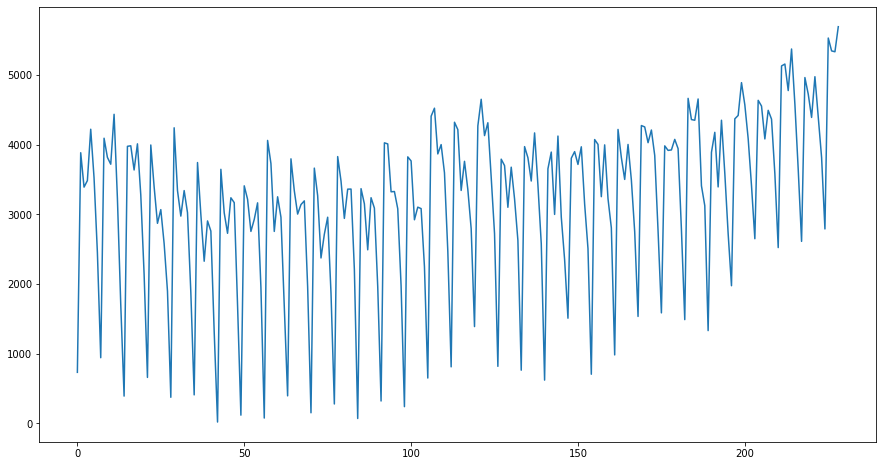

In [69]:
plt.plot(test_predict)

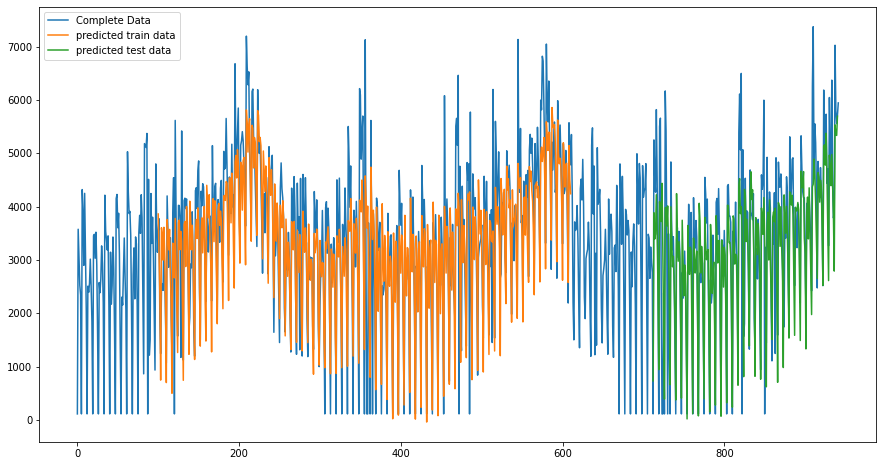

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [71]:
len(test_data)


330

In [72]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [74]:
temp_input #All my test_data is present here (previous 100 days data)

[0.7511707988980716,
 0.7101928374655647,
 0.6205234159779615,
 0.5569559228650138,
 0.8086776859504132,
 0.7900826446280992,
 0.802892561983471,
 0.9050964187327823,
 0.5,
 0.7151515151515151,
 0.5915977961432507,
 0.83133608815427,
 0.7307162534435262,
 0.7441460055096418,
 0.7865702479338843,
 0.7664600550964187,
 0.6367768595041322,
 0.5684573002754821,
 0.7258953168044077,
 0.7193526170798898,
 0.7856060606060606,
 0.578030303030303,
 0.8307162534435262,
 0.6650137741046832,
 0.6016528925619835,
 0.8251377410468319,
 0.7927685950413224,
 0.7930440771349863,
 0.8098484848484848,
 0.7802341597796143,
 0.6877410468319559,
 0.6395316804407714,
 0.61232782369146,
 0.759228650137741,
 0.7268595041322314,
 0.806129476584022,
 0.787396694214876,
 0.6761019283746557,
 0.6227272727272727,
 0.8577823691460055,
 0.7822314049586776,
 0.7907713498622589,
 0.8288567493112948,
 0.8307162534435262,
 0.7074380165289256,
 0.665564738292011,
 0.7668044077134986,
 0.7443526170798898,
 0.71460055096418

In [75]:
len(temp_input)

100

In [76]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.8123808]
101
1 day input [0.71019284 0.62052342 0.55695592 0.80867769 0.79008264 0.80289256
 0.90509642 0.5        0.71515152 0.5915978  0.83133609 0.73071625
 0.74414601 0.78657025 0.76646006 0.63677686 0.5684573  0.72589532
 0.71935262 0.78560606 0.5780303  0.83071625 0.66501377 0.60165289
 0.82513774 0.7927686  0.79304408 0.80984848 0.78023416 0.68774105
 0.63953168 0.61232782 0.75922865 0.7268595  0.80612948 0.78739669
 0.67610193 0.62272727 0.85778237 0.7822314  0.79077135 0.82885675
 0.83071625 0.70743802 0.66556474 0.76680441 0.74435262 0.71460055
 0.77045455 0.74483471 0.71115702 0.64318182 0.85909091 0.81646006
 0.78719008 0.77940771 0.77899449 0.6988292  0.63677686 0.77190083
 0.75984848 0.74022039 0.77961433 0.75206612 0.72548209 0.6588843
 0.92320937 1.         0.82073003 0.87451791 0.85020661 0.78946281
 0.66267218 0.82596419 0.7927686  0.77871901 0.81804408 0.78918733
 0.75495868 0.66556474 0.91818182 0.86363636 0.82603306 0.88698347
 0.79772727 0.81639118 0.71707989 0

In [77]:
lst_output

[[0.8123807907104492],
 [0.7091289758682251],
 [0.905969500541687],
 [0.8585424423217773],
 [0.8325597643852234],
 [0.8787318468093872],
 [0.8320143222808838],
 [0.7765568494796753],
 [0.7092896699905396],
 [0.9065335392951965],
 [0.8494551777839661],
 [0.8482882380485535],
 [0.8695110082626343],
 [0.8550487160682678],
 [0.8002957701683044],
 [0.7129794359207153],
 [0.9083327651023865],
 [0.8523755669593811],
 [0.8279860019683838],
 [0.8474235534667969],
 [0.8399696350097656],
 [0.7705686688423157],
 [0.7121515274047852],
 [0.8776938319206238],
 [0.8530187606811523],
 [0.8409531116485596],
 [0.8615424633026123],
 [0.8445684313774109],
 [0.7729788422584534],
 [0.7153180241584778],
 [0.8722405433654785],
 [0.8343498706817627],
 [0.8079355955123901],
 [0.8431261777877808],
 [0.8167046308517456],
 [0.7537497282028198],
 [0.6762168407440186],
 [0.8587784767150879],
 [0.8290879130363464],
 [0.8010722994804382],
 [0.8418550491333008],
 [0.8180282115936279],
 [0.7557903528213501],
 [0.70135062

In [78]:
len(lst_output)

80

In [79]:
fnl_output=scaler.inverse_transform(lst_output)

In [80]:
fnl_output

array([[4647.76908112],
       [3148.55272961],
       [6006.67714787],
       [5318.03626251],
       [4940.76777887],
       [5611.18641567],
       [4932.84795952],
       [4127.60545444],
       [3150.88600826],
       [6014.86699057],
       [5186.08918142],
       [5169.14521646],
       [5477.29983997],
       [5267.30735731],
       [4472.29458284],
       [3204.46140957],
       [6040.99174929],
       [5228.49323225],
       [4874.35674858],
       [5156.58999634],
       [5048.35910034],
       [4040.65707159],
       [3192.44017792],
       [5596.11443949],
       [5237.83240509],
       [5062.63918114],
       [5361.59656715],
       [5115.1336236 ],
       [4075.65278959],
       [3238.41771078],
       [5516.93268967],
       [4966.7601223 ],
       [4583.22484684],
       [5094.19210148],
       [4710.55123997],
       [3796.4460535 ],
       [2670.6685276 ],
       [5321.4634819 ],
       [4890.35649729],
       [4483.56978846],
       [5075.73531342],
       [4729.769

In [81]:
len(fnl_output)

80

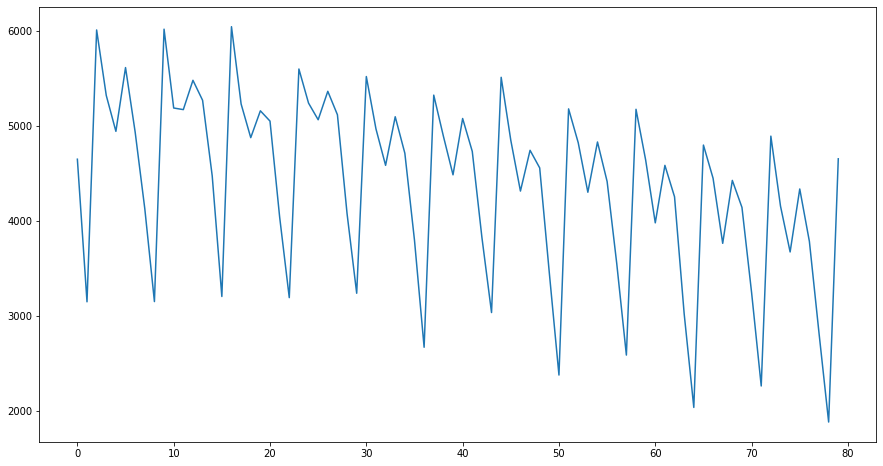

In [82]:
plt.plot(fnl_output)

In [83]:
import matplotlib.pyplot as plt

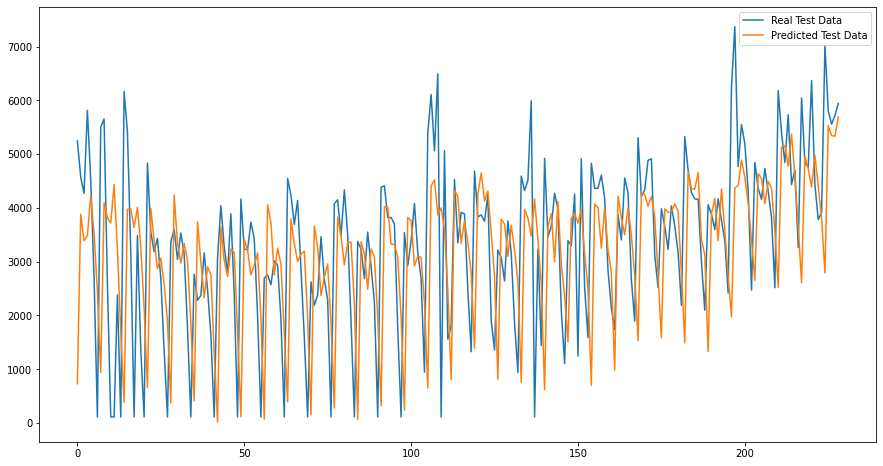

In [84]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [85]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [86]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [87]:
ff

,Forecast
0,4647.769081
1,3148.552730
2,6006.677148
3,5318.036263
4,4940.767779
...,...
75,4334.725477
76,3783.636388
77,2819.492068
78,1884.609797


In [88]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [89]:
ff

,Forecast,Time_Stamp
0,4647.769081,2015-08-01
1,3148.552730,2015-08-02
2,6006.677148,2015-08-03
3,5318.036263,2015-08-04
4,4940.767779,2015-08-05
...,...,...
75,4334.725477,2015-10-15
76,3783.636388,2015-10-16
77,2819.492068,2015-10-17
78,1884.609797,2015-10-18


In [90]:
ff=ff.set_index('Time_Stamp')

In [91]:
ff

,Forecast
Time_Stamp,
2015-08-01,4647.769081
2015-08-02,3148.552730
2015-08-03,6006.677148
2015-08-04,5318.036263
2015-08-05,4940.767779
...,...
2015-10-15,4334.725477
2015-10-16,3783.636388
2015-10-17,2819.492068


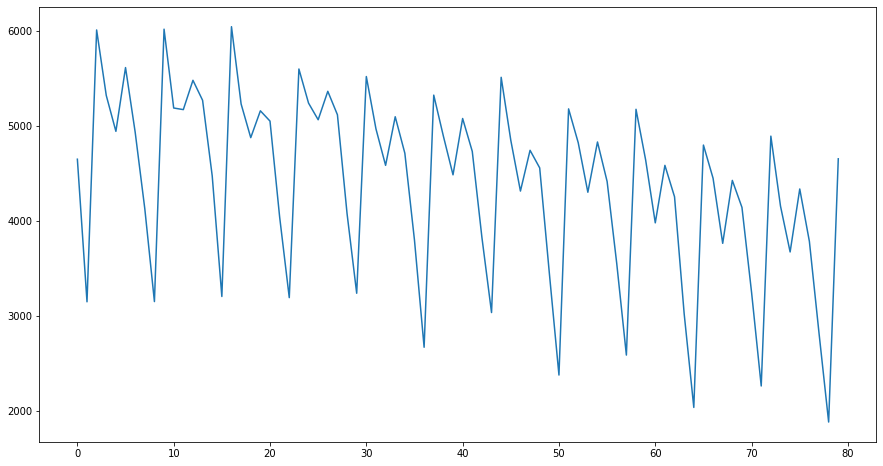

In [92]:
plt.plot(fnl_output)

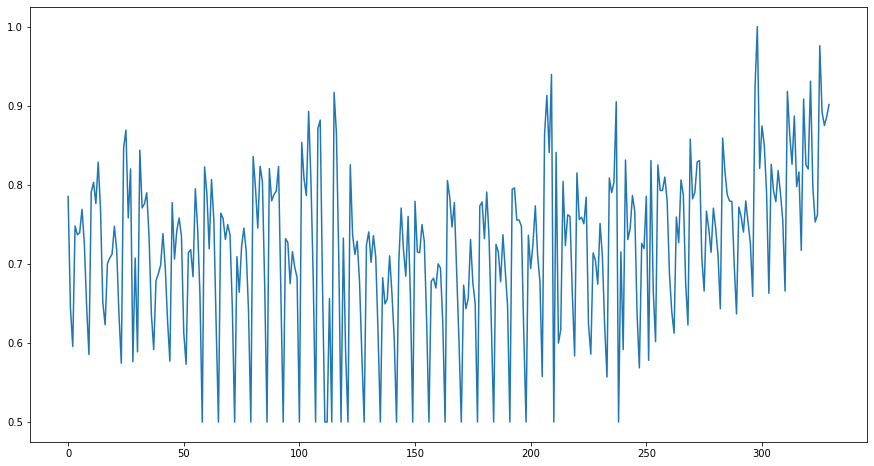

In [93]:
plt.plot(test_data)

In [94]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

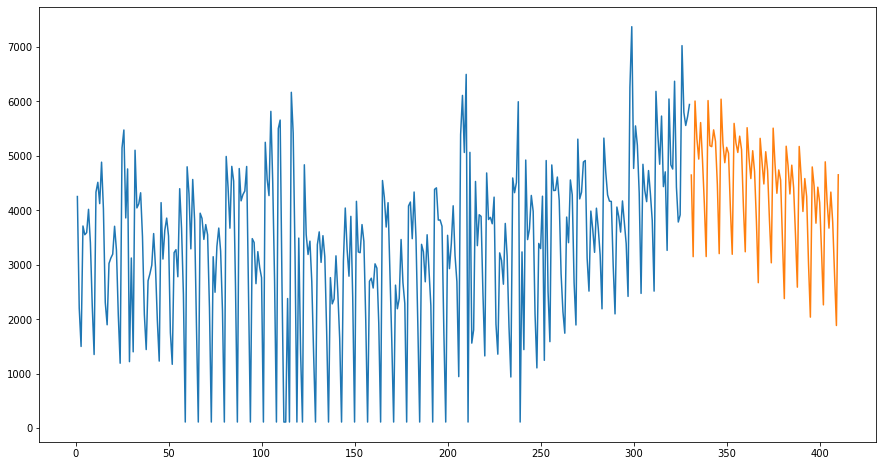

In [95]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [96]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

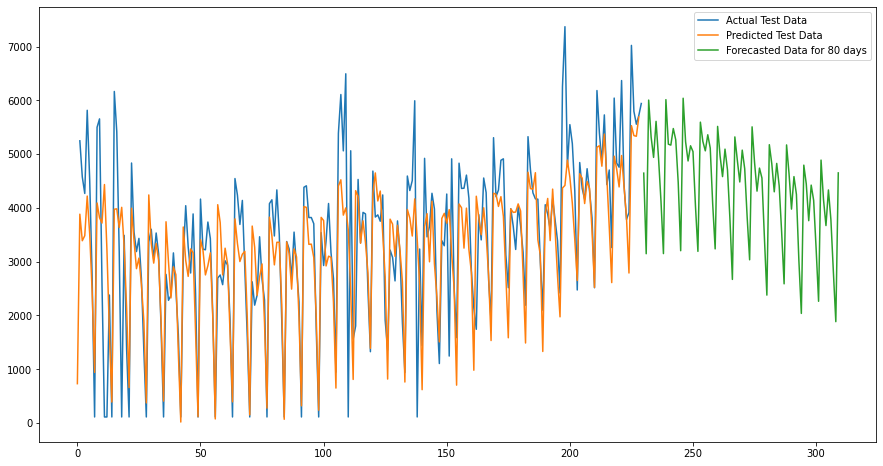

In [97]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [98]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,6525
2013-08-02,5025
2013-08-03,4493
2013-08-04,3375
2013-08-05,6155


In [99]:
vv.tail()

,Sales
Date,
2013-10-15,2638
2013-10-16,3052
2013-10-17,3016
2013-10-18,3041
2013-10-19,1760


In [100]:
len(vv)

80

In [101]:
jj=atr2.iloc[577:657]

In [102]:
jj.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [103]:
jj.tail()

,Sales
Date,
2014-10-15,2993
2014-10-16,3573
2014-10-17,2949
2014-10-18,1967
2014-10-19,1231


In [104]:
len(jj)

80

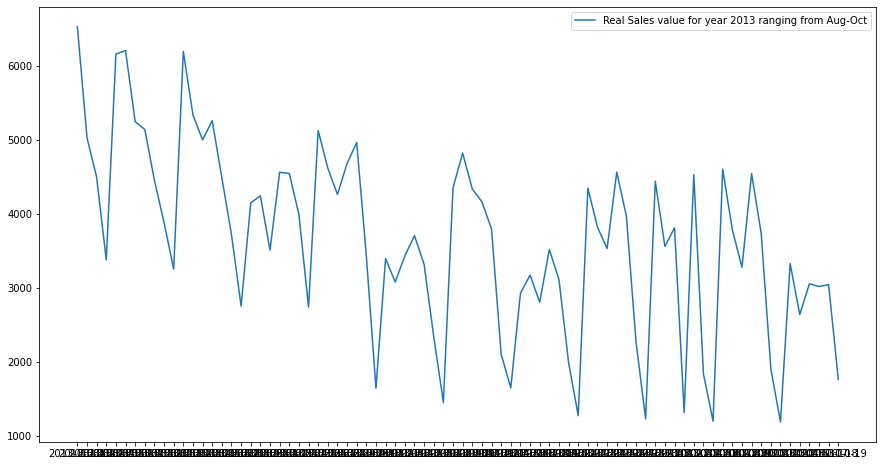

In [105]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

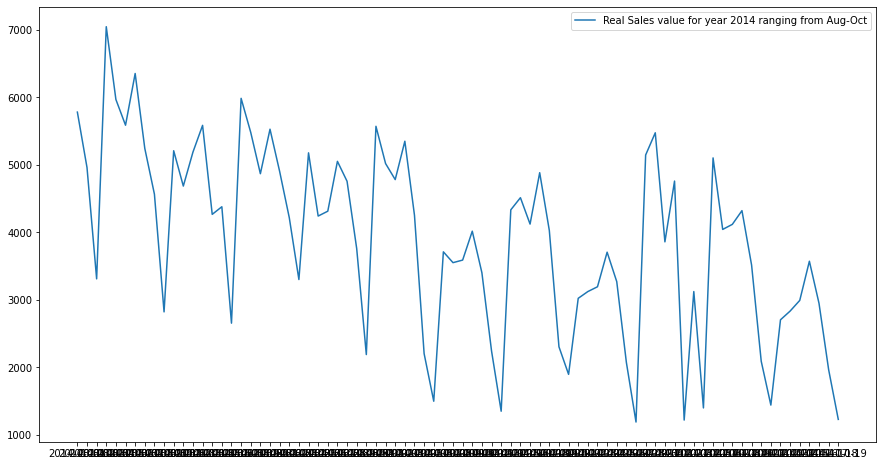

In [106]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [107]:
a1=vv.reset_index()['Sales']

In [108]:
a1

0     6525
1     5025
2     4493
3     3375
4     6155
      ... 
75    2638
76    3052
77    3016
78    3041
79    1760
Name: Sales, Length: 80, dtype: int64

In [109]:
len(a1)

80

In [110]:
b1=jj.reset_index()['Sales']

In [111]:
b1

0     5781
1     4961
2     3312
3     7046
4     5968
      ... 
75    2993
76    3573
77    2949
78    1967
79    1231
Name: Sales, Length: 80, dtype: int64

In [112]:
len(b1)

80

In [113]:
len(train_predict)

511

In [114]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,3771
2013-04-13,1893
2013-04-14,1241
2013-04-15,2436
2013-04-16,2555
...,...
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019


In [115]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [116]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [117]:
njc

,Predicted Train Data
0,3860.568848
1,3124.859863
2,2362.692139
3,746.025208
4,3602.521729
...,...
506,3997.925781
507,2575.638428
508,5142.823730
509,4506.317383


In [118]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [119]:
njc

,Predicted Train Data,time_Stamp
0,3860.568848,2013-04-12
1,3124.859863,2013-04-13
2,2362.692139,2013-04-14
3,746.025208,2013-04-15
4,3602.521729,2013-04-16
...,...,...
506,3997.925781,2014-08-31
507,2575.638428,2014-09-01
508,5142.823730,2014-09-02
509,4506.317383,2014-09-03


In [120]:
njc=njc.set_index('time_Stamp')

In [121]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,3860.568848
2013-04-13,3124.859863
2013-04-14,2362.692139
2013-04-15,746.025208
2013-04-16,3602.521729
...,...
2014-08-31,3997.925781
2014-09-01,2575.638428
2014-09-02,5142.823730


In [122]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,5021.124023
2013-08-02,5529.261230
2013-08-03,5647.136719
2013-08-04,4388.190918
2013-08-05,3350.237549
...,...
2013-10-15,3670.456787
2013-10-16,2967.888916
2013-10-17,2616.128906


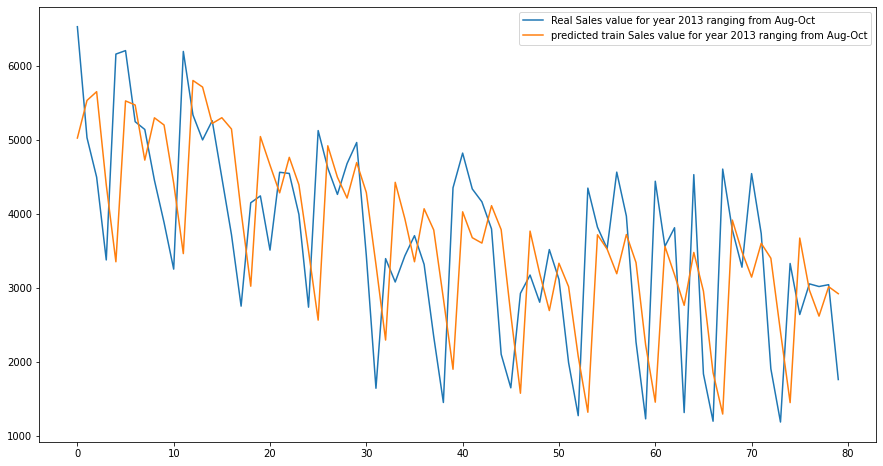

In [123]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [124]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

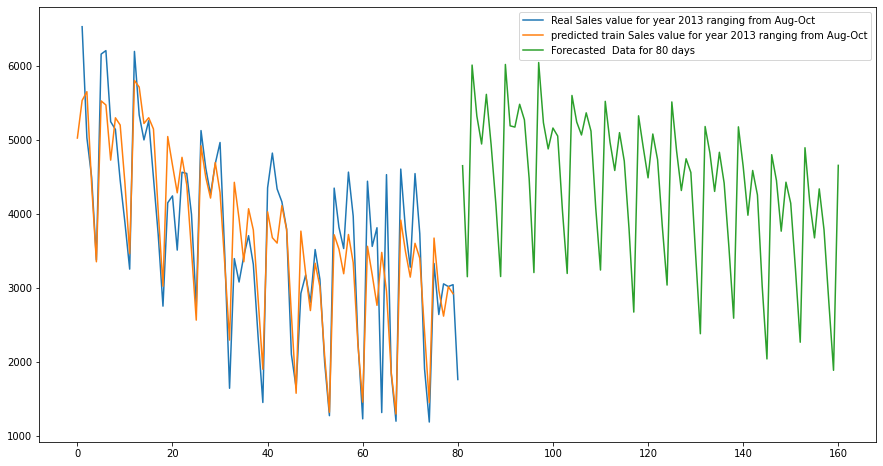

In [125]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [126]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,5781
2014-08-02,4961
2014-08-03,3312
2014-08-04,7046
2014-08-05,5968


In [127]:
nn.tail()

,Sales
Date,
2014-08-31,2191
2014-09-01,5571
2014-09-02,5019
2014-09-03,4782
2014-09-04,5350


In [128]:
len(nn)

35

In [129]:
c1=nn.reset_index()['Sales']

In [130]:
c1

0     5781
1     4961
2     3312
3     7046
4     5968
5     5587
6     6353
7     5244
8     4566
9     2823
10    5209
11    4686
12    5189
13    5585
14    4267
15    4380
16    2656
17    5985
18    5480
19    4869
20    5528
21    4903
22    4219
23    3302
24    5178
25    4242
26    4314
27    5052
28    4757
29    3761
30    2191
31    5571
32    5019
33    4782
34    5350
Name: Sales, dtype: int64

In [131]:
len(c1)

35

In [132]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,5021.238281
2014-08-02,5293.918457
2014-08-03,4506.158203
2014-08-04,2832.205566
2014-08-05,5589.014160
2014-08-06,5338.411621
2014-08-07,5051.022949
2014-08-08,5393.032715
2014-08-09,5388.945801


In [133]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

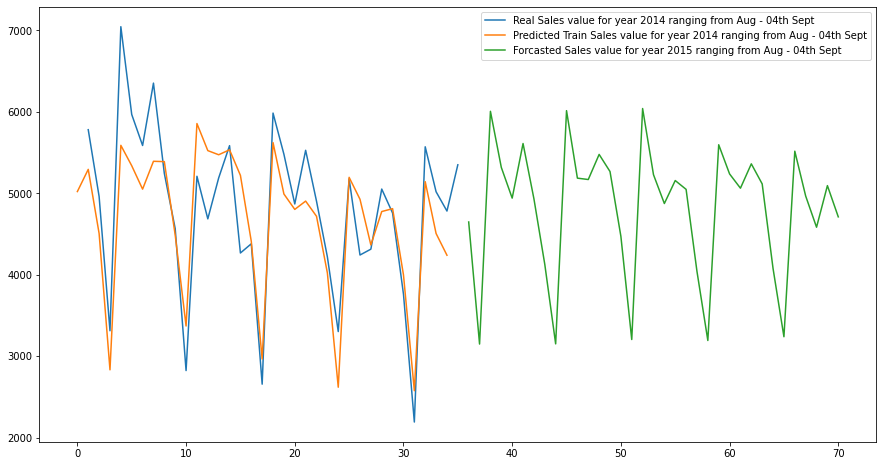

In [134]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/bidirectional-lstm-store-931


'https://jovian.ai/ismailzain1697/bidirectional-lstm-store-931'